**Abstract**

Hepatitis C is a liver disease caused by the hepatitis C virus. When someone is first infected with the hepatitis C virus, they can have a very mild illness with few or no symptoms or a serious condition requiring hospitalization. For reasons that are not known, less than half of people who get hepatitis C are able to clear, or get rid of, the virus without treatment in the first 6 months after infection.

The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data

'0s=suspect Blood Donor', '0=Blood Donor', '1=Hepatitis', '2=Fibrosis', 3=Cirrhosis'

In [1]:
# Importing the necessary components
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Insuring the notebook's graphs are seaborn standard
sns.set()

In [2]:
# Loading the dataset into a dataframe
df = pd.read_csv('HepatitisCdata.csv')
df.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [3]:
# Checking the shape of dataset
df.shape

(615, 14)

In [4]:
# Checking for null values in the datasets
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [5]:
# Imputing the null values (Replacing the missing or null values with a particular value in the entire dataset)
from sklearn.impute import SimpleImputer

# Imputing the null values with the mode of the column
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.8,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.3,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,52.5,39.0,62.0,20.0,3.56,4.2,52.0,50.0,71.0


In [6]:
# Checking if there are any null values left over after imputing the null values
df_imputed.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [7]:
# Finding the unique values in the columns to make sure no typos exist
for i in df_imputed.columns:
    print(i)
    print()
    # Converting the dataframe object to a list then turning that list into a set
    print(set(df_imputed[i].tolist()))
    print()

Unnamed: 0

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [8]:
# Replacing typo values with the actual values in the columns with typo errors using lambda functions
df_imputed["Category"]=df_imputed["Category"].apply(lambda x:0 if x=='0s=suspect Blood Donor' else x)
df_imputed["Category"]=df_imputed["Category"].apply(lambda x:1 if x=='0=Blood Donor' else x)
df_imputed["Category"]=df_imputed["Category"].apply(lambda x:2 if x=='1=Hepatitis' else x)
df_imputed["Category"]=df_imputed["Category"].apply(lambda x:3 if x=='2=Fibrosis' else x)
df_imputed["Category"]=df_imputed["Category"].apply(lambda x:4 if x=='3=Cirrhosis' else x)

In [9]:
# Finding the unique values in the columns within the corrected dataset to make sure typo errors are removed
for i in df_imputed.columns:
    print(i)
    print()
    print(set(df_imputed[i].tolist()))
    print()

Unnamed: 0

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

AxesSubplot(0.125,0.11;0.775x0.77)


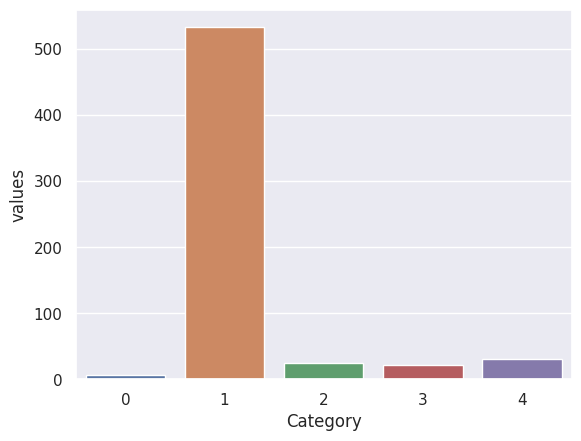

In [10]:
# Checking for label imbalance 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a temporary dataframe to check how many times a particular value/class has occured
temp=df_imputed["Category"].value_counts()
temp_df= pd.DataFrame({'Category': temp.index,'values': temp.values})
print(sns.barplot(x = 'Category', y="values", data=temp_df))

In [11]:
# Checking the data types of the main dataframe
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [12]:
# Checking the data types of the fixed dataframe
df_imputed.dtypes

Unnamed: 0    object
Category       int64
Age           object
Sex           object
ALB           object
ALP           object
ALT           object
AST           object
BIL           object
CHE           object
CHOL          object
CREA          object
GGT           object
PROT          object
dtype: object

In [13]:
# Selecting the columns from the main dataframe that are not objects
for i in df.select_dtypes(exclude=["object"]).columns:
    # Converting the values to floats
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [14]:
# Checking the data types of the corrected imputed dataframe
df_imputed.dtypes

Unnamed: 0    float64
Category        int64
Age           float64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

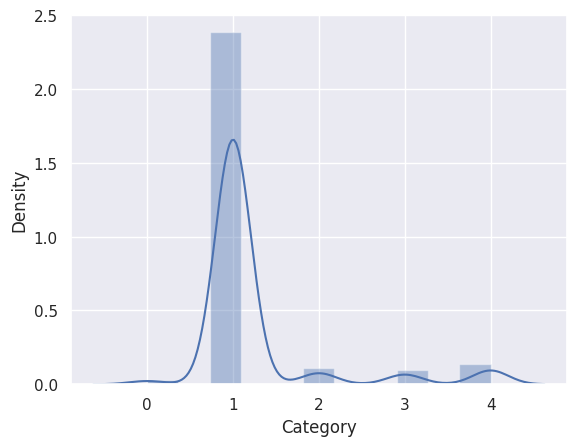

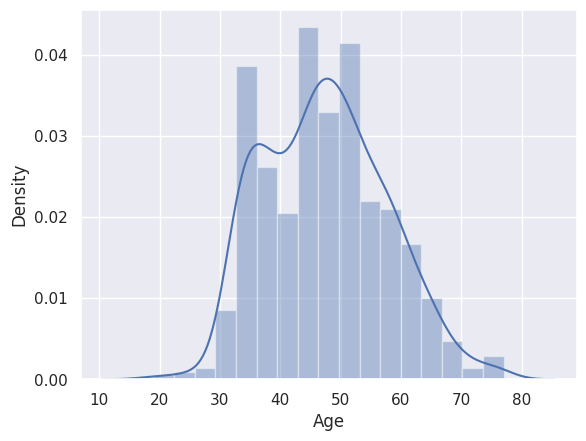

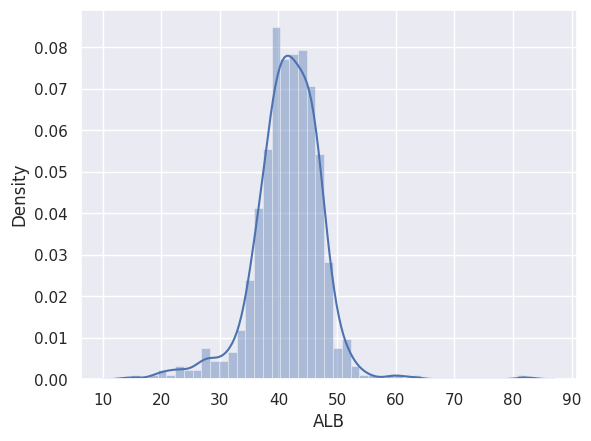

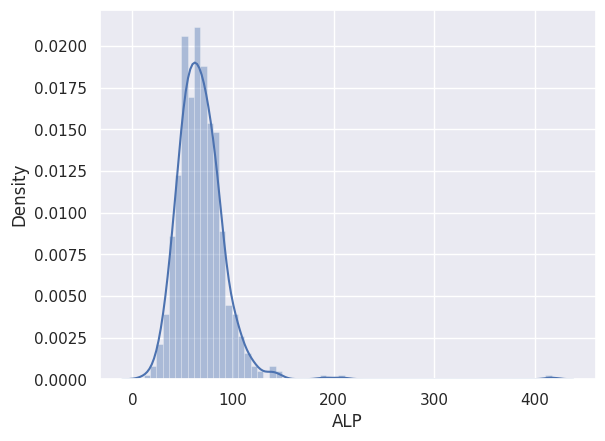

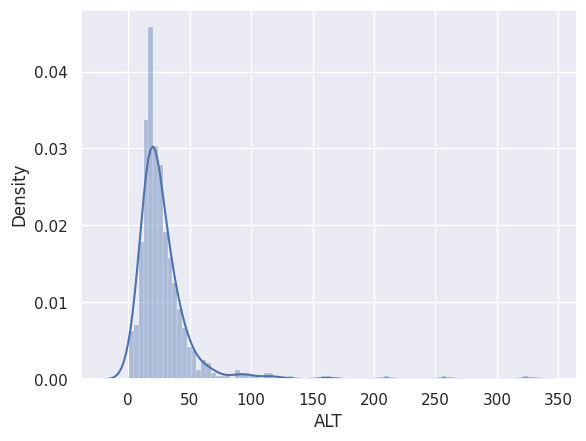

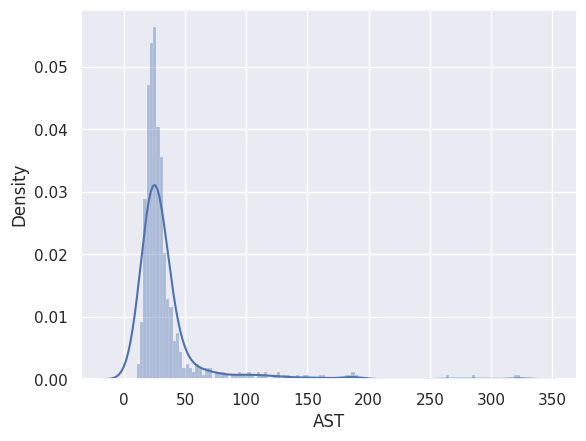

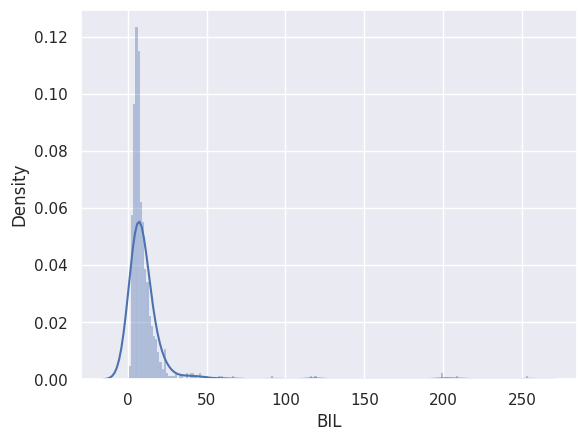

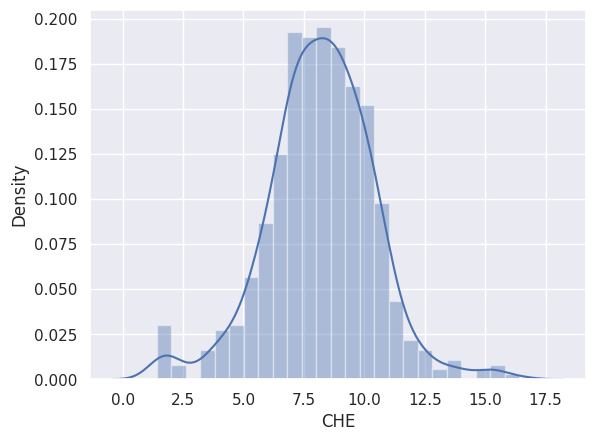

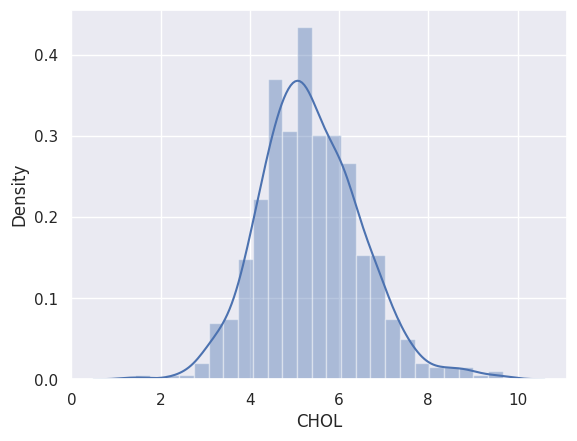

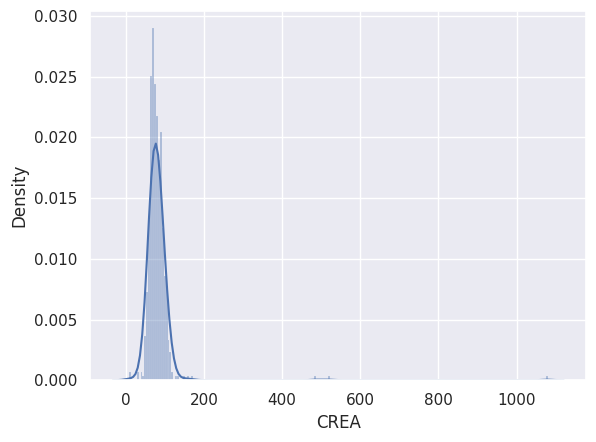

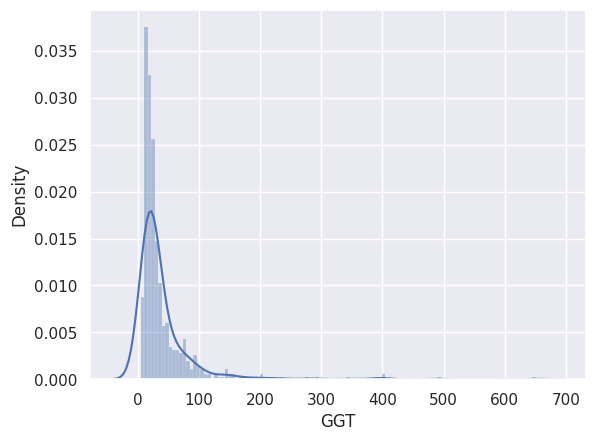

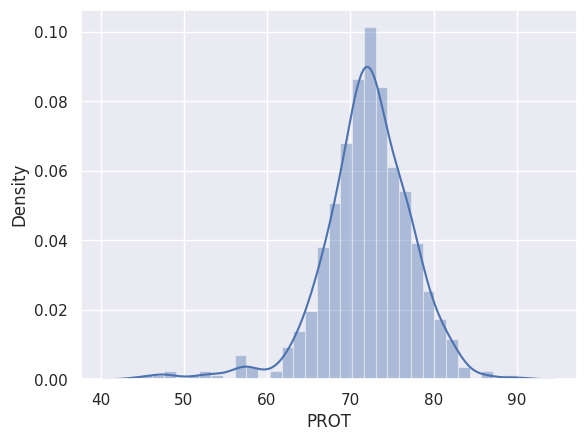

In [15]:
# Finding the distribution of the data and making sure it follows a normal distribution (bell curve)
def distplots(col):
    sns.histplot(
    df_imputed[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
    plt.show()
    
# Looping through each column except for object data types
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

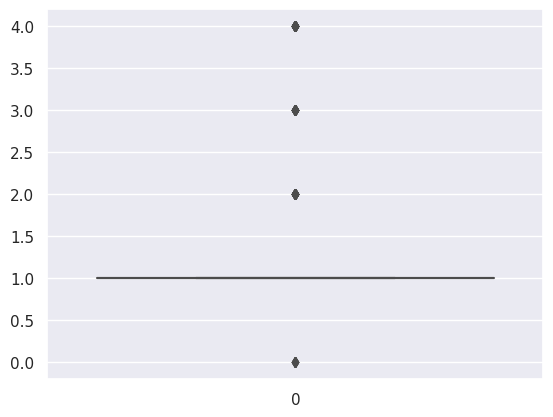

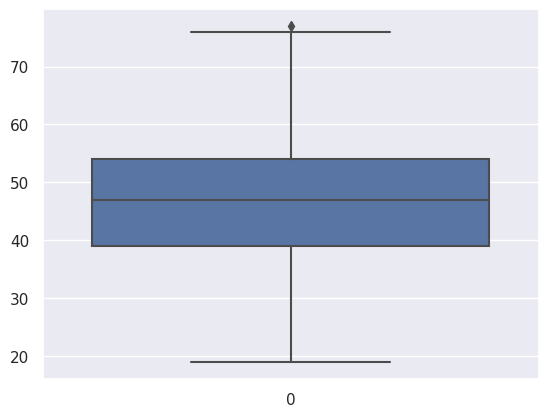

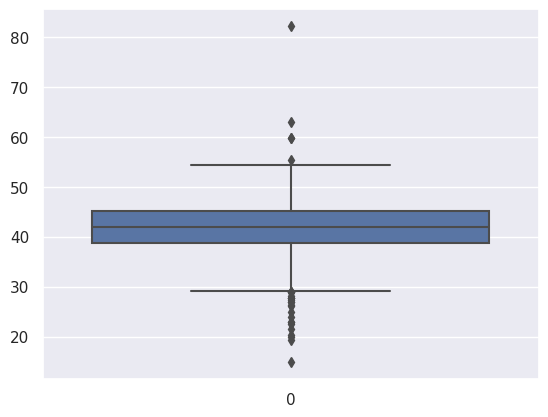

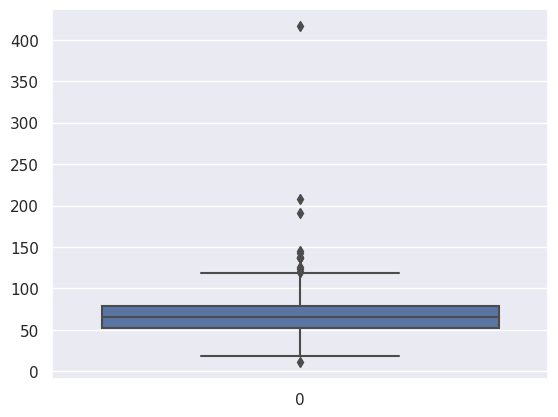

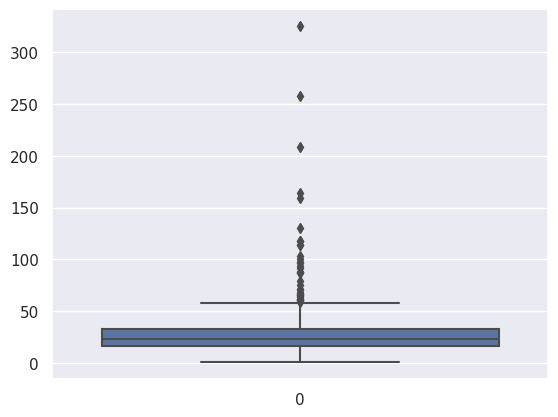

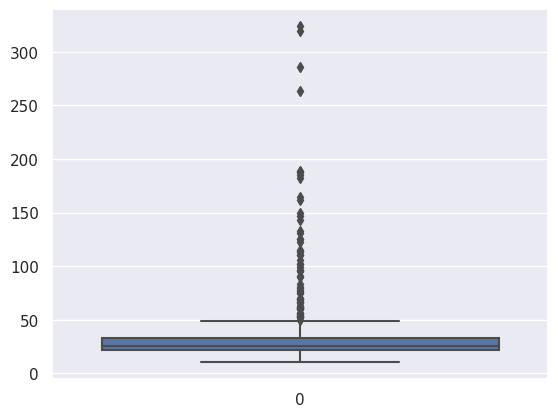

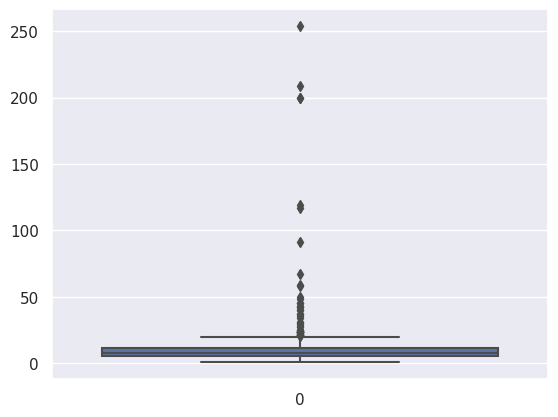

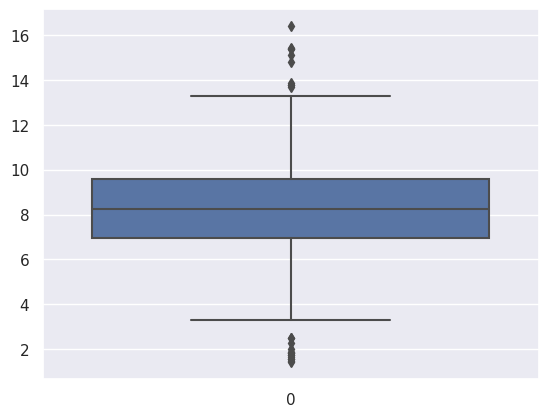

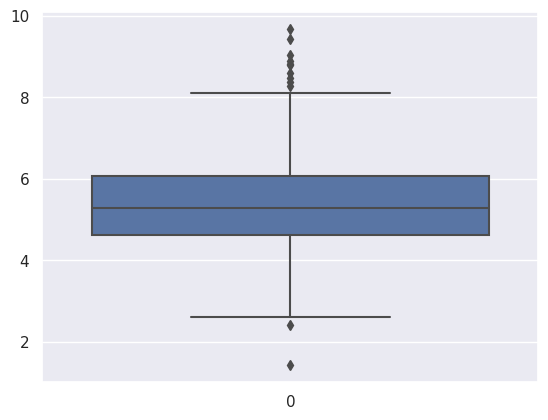

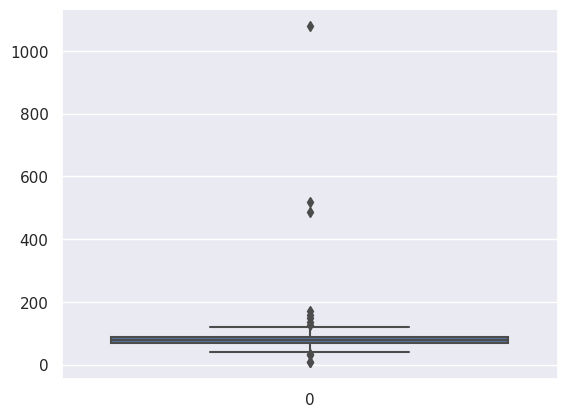

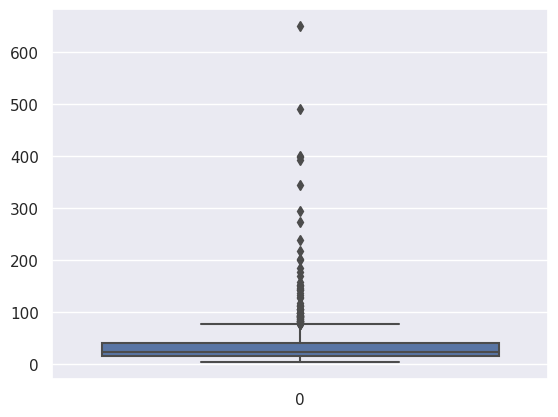

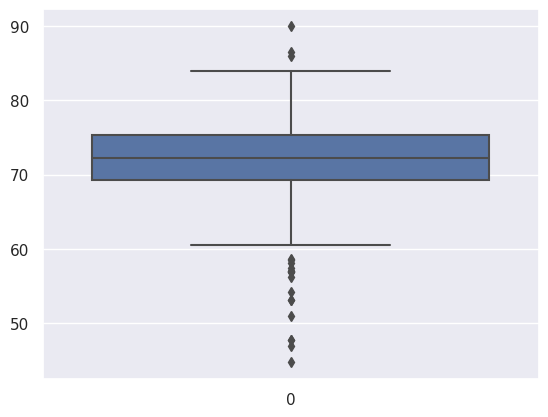

In [16]:
# Finding the outliers within the data using boxplots
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [17]:
# Labeling encoding to convert categorical values to numerical values since the algorithm will use numerical values (replacing checked with 1 and unchecked with 0)
from sklearn import preprocessing

# Applying preprocessing to the entire dataframe
df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,1,6,1,64,107,23,71,56,118,12,97,37,69
1,1,1,6,1,64,227,99,96,20,371,109,53,64,144
2,2,1,6,1,146,262,238,239,42,245,144,76,196,170
3,3,1,6,1,111,103,202,76,142,146,106,65,199,136
4,4,1,6,1,71,259,217,97,77,265,69,57,178,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,4,36,0,20,413,18,275,178,53,233,16,357,64
611,611,4,38,0,7,383,7,226,147,2,6,32,210,92
612,612,4,38,0,15,341,8,270,177,4,25,38,275,185
613,613,4,20,0,23,107,250,249,147,15,58,11,250,89


In [18]:
# Saving the preprocessed dataframe as a .csv file
df_enco.to_csv("HepatitisC_Pre-Processed.csv")

<AxesSubplot: >

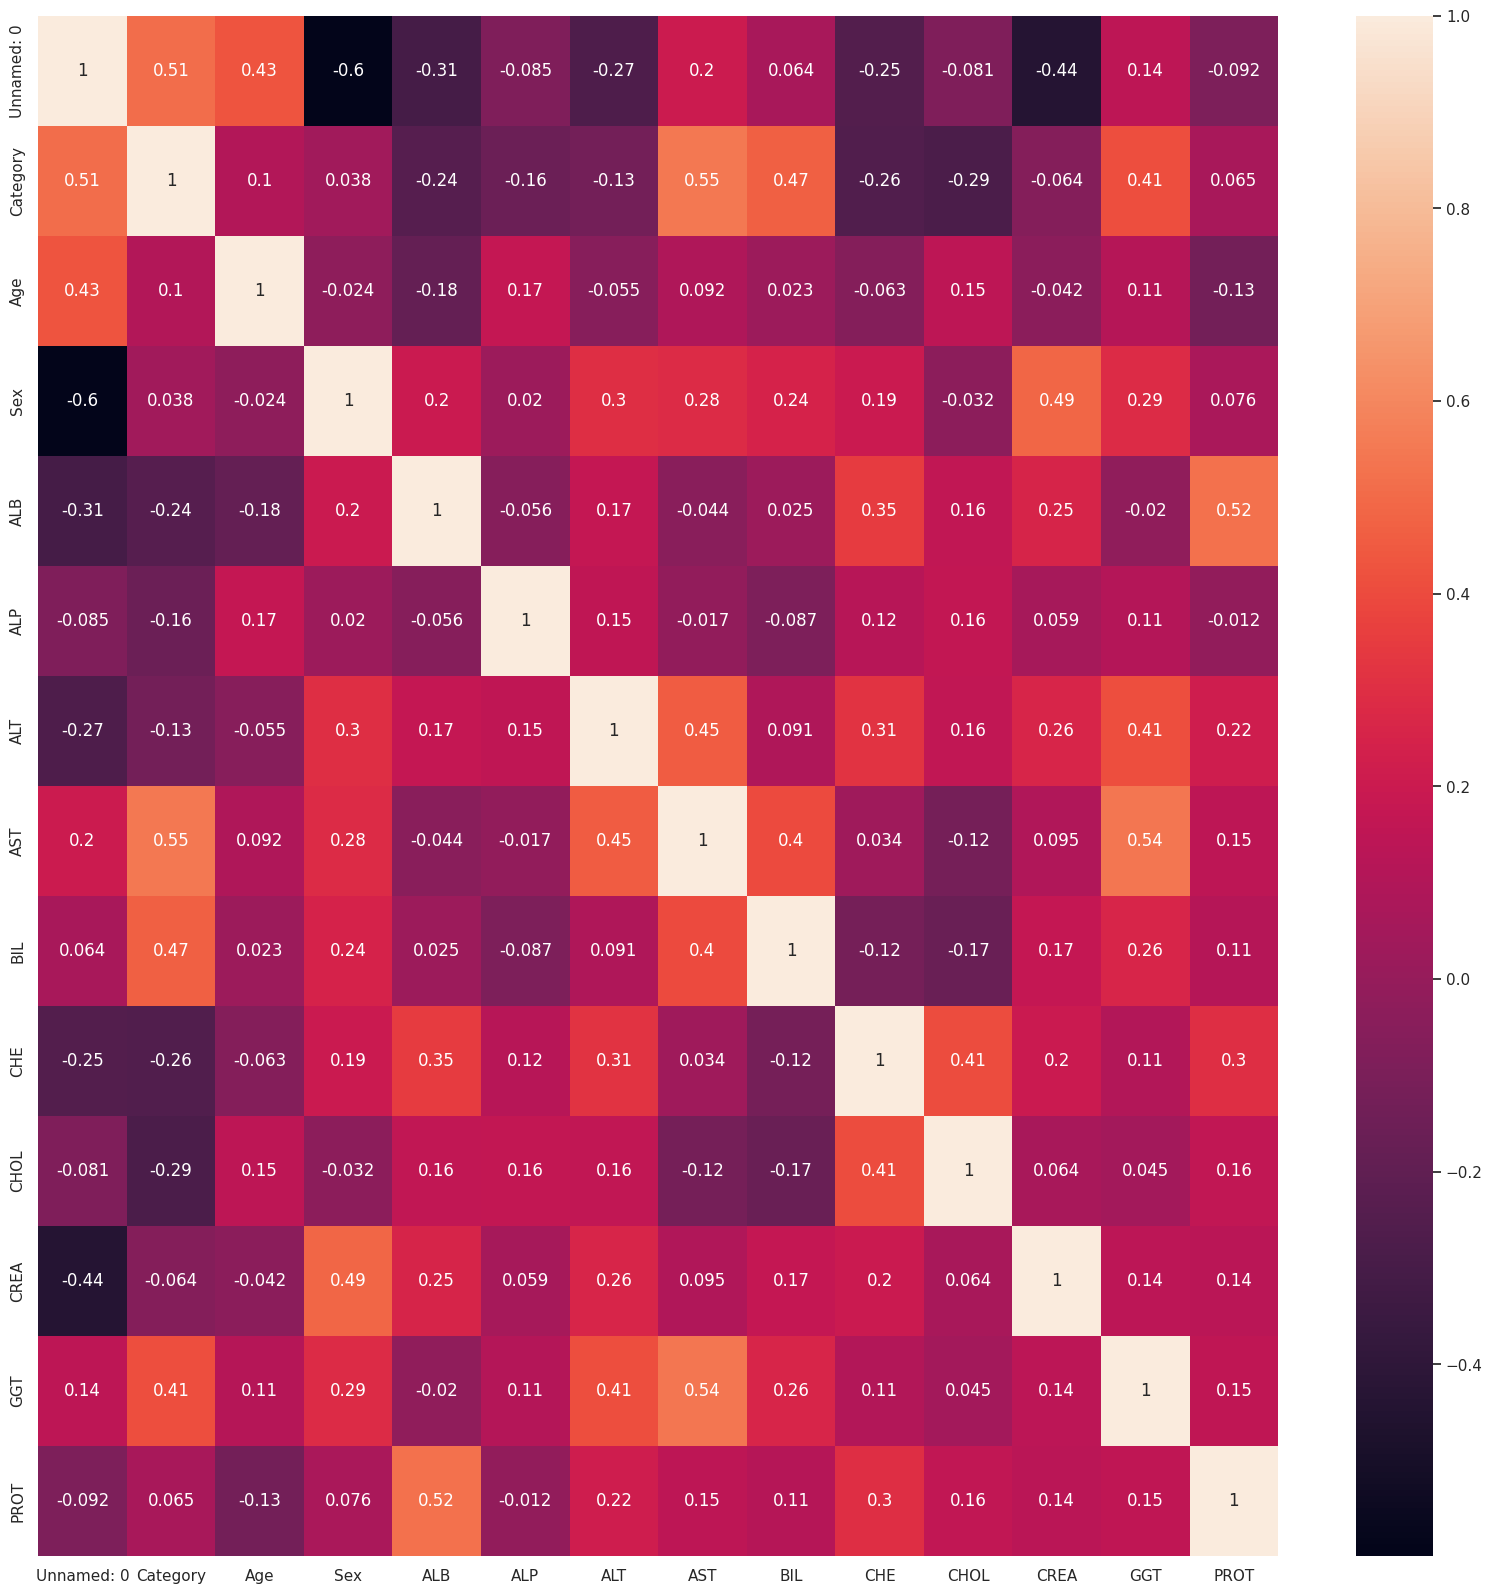

In [19]:
# Finding the correlations between the variables using a heatmap
# High correlations between two independent variables will cause issues
plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [20]:
# Seperating the independent and dependent variables and dropping the ID column
x=df_enco.drop(["Unnamed: 0","Category"],axis=1)
y=df_enco["Category"]

In [21]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({1: 533, 4: 30, 2: 24, 3: 21, 0: 7})


In [22]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({1: 533, 0: 533, 2: 533, 3: 533, 4: 533})


In [23]:
# Scaling using the MinMaxScaler to ensure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [24]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(2665, 12)
(2665, 10)


In [25]:
# Splitting the dataset into the training and testing datasets while preserving 20% of the data for testing and 80% of the data for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)
# Making a second split to create the final training dataset and the validation dataset (the dataset that allows hyperparamter tuning/tuning the number of hidden layers with unbiased data)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [26]:
# Creating a stacked model to handle classification
from sklearn.ensemble import StackingClassifier

estimators=[]
# Creating a base estimator models that use multiple samples with replacement from the training data to train on
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Using 50% of each sample in the dataset, all features, and 10 decision trees
estimators.append(('DT',DecisionTreeClassifier()))
estimators.append(('BC',BaggingClassifier()))

# Implementing a stacked classifier model with a final estimator of an XGBClassifier
from xgboost import XGBClassifier
model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
model.fit(x_train, y_train)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('BC', BaggingClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,
                                                 feature_types=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [27]:
# Predicting strokes
Target_Classifcation = model.predict(x_test)
# Creating a confusion matrix to determine correct and incorrect predictions
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, Target_Classifcation))

Confusion Matrix:
[[107   0   0   0   0]
 [  0 106   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 107   0]
 [  0   0   0   0 111]]


In [28]:
# Obtaining an F1 score that is a weighted average of the precision and recall
from sklearn.metrics import f1_score

f1_score(y_test,model.predict(x_test),average='weighted')

1.0

In [29]:
# Creating a classification report that displays all evaluation matrices and shows accuracy, etc.
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       107
           4       1.00      1.00      1.00       111

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc00e448-d362-45f0-bbcd-01ab0cb3782c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>